# Evaluate the performance of the logistic regression on plate 1 data

## Imports

In [1]:
import sys
import pandas as pd
from pathlib import Path


from joblib import dump, load

## Find the root of the git repo on the host system

In [2]:
# Get the current working directory
cwd = Path.cwd()

if (cwd / ".git").is_dir():
    root_dir = cwd

else:
    root_dir = None
    for parent in cwd.parents:
        if (parent / ".git").is_dir():
            root_dir = parent
            break

# Check if a Git root directory was found
if root_dir is None:
    raise FileNotFoundError("No Git root directory found.")

## Import Utils

In [3]:
sys.path.append(f"{root_dir}/2.evaluate_models/log_reg_plates_cp_fs_data/utils")
import log_reg_plates_cp_fs_data_evaluate_util as au

## Create Paths

In [4]:
fig_out_path = Path("model_performance_figures")

if not fig_out_path.exists():
    fig_out_path.mkdir()

models_path = Path(f"{root_dir}/1.train_models/log_reg_plates_cp_fs_data/plate_1/data")

## Load Data

In [5]:
lr = load(models_path / "plate_1_cp_fs_data_lr_model.joblib")
testdf = pd.read_csv(models_path / "plate_1_cp_fs_data_testdf.tsv", sep="\t")
le = load(models_path / "plate_1_cp_fs_data_label_encoder.joblib")

## Make Predictions and Report

In [6]:
testdf = au.make_preds(testdf, lr)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.91      0.91      0.91        11

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



## Resave the testdf with Predictions

In [7]:
dump(testdf, models_path / "testdf.joblib")

['/home/camo/projects/NF1_SchwannCell_data_analysis/1.train_models/log_reg_plates_cp_fs_data/plate_1/data/testdf.joblib']

## Find Confusion Matrix

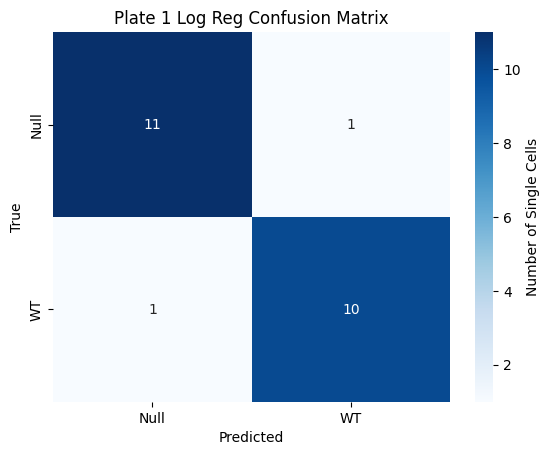

In [8]:
au.plot_confusion(
    testdf,
    le,
    title="Plate 1 Log Reg Confusion Matrix",
    fig_out_path=f"{fig_out_path}/log_reg_plate_1_cp_fs_data_confusion_matrix.png",
)

## Calculate the metrics for each Genotype

In [9]:
df = au.calc_metrics(testdf, le)

## Plot the performance of the Logistic Regression

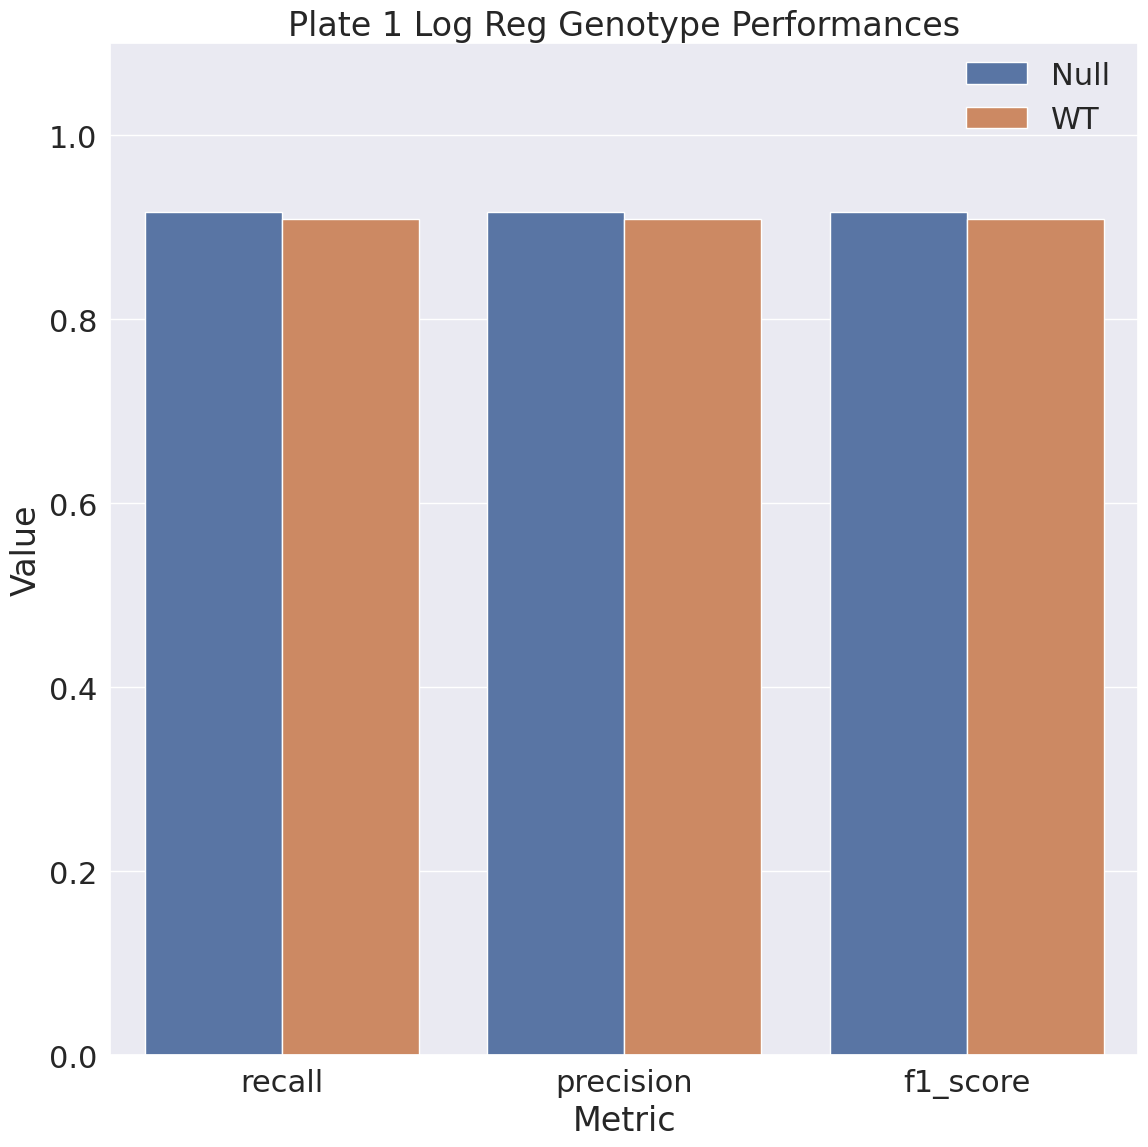

In [10]:
au.plot_performance(
    df,
    title="Plate 1 Log Reg Genotype Performances",
    fig_out_path=f"{fig_out_path}/log_reg_plate_1_cp_fs_data_confusion_matrix.png",
)